In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import accuracy_score

In [47]:
df = pd.read_csv('./data/titanic/train.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [50]:
df = df.drop('Cabin', axis = 1)

In [51]:
df = df[df.Age.notna()]

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [53]:
vars_disc = ['Survived', 'Pclass', 'Sex',  'SibSp','Parch','Embarked']

for i in vars_disc:
    df[i].value_counts()

In [54]:
vars_cat = ['Pclass', 'Sex','Embarked']

# One hot encoding
for i in vars_cat:
    categorias = df[i].value_counts().index
        

    for k in categorias:
        name = 'is-' + str(i) + '-' +str(k)
           
        df[name] = np.where(df[i] == k,1,0)

    df = df.drop(i, axis = 1)

In [55]:
df = df.drop(['is-Pclass-3', 'is-Sex-male', 'is-Embarked-C'], axis = 1) # Para evitar multicolinealidad

In [56]:
df['family_size'] = df['SibSp'] + df['Parch']

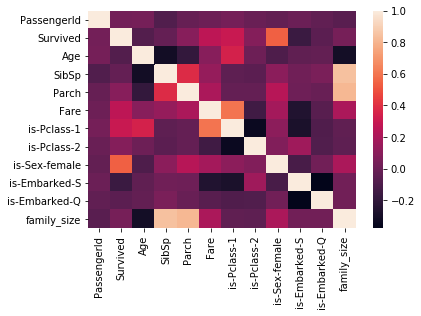

In [57]:
corr = df.corr()
sns.heatmap(corr, yticklabels = corr.columns, xticklabels = corr.columns) 

In [58]:
ynum = df['Age']

In [63]:
# Outliers en Edad
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

RI = Q3 - Q1

lim_inf = Q1 - 1.5*RI
lim_sup = Q3 + 1.5*RI

[lim_inf, lim_sup]

[-6.6875, 64.8125]

In [66]:
y = df['Survived']
X = df[[ 'Age', 'SibSp', 'Parch','Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-female', 'is-Embarked-S','is-Embarked-Q', 'family_size']]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 1)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf = [
    (LogisticRegression(),'reg-log'),
    (DecisionTreeClassifier(), 'arbol-class')
]

In [74]:
import joblib 

for model, name in clf:
    
    #Entrenar
    model.fit(X_train, y_train)
    
    #Medir
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(name)
    print('Resultado en la prueba del modelo: ',round(accuracy*100,2),'%')
    print('__'*20)
    
    #Guardar
    job_file = 'modelo-' + name + '.pk'
    joblib.dump(model, job_file)

reg-log
Resultado en la prueba del modelo:  77.78 %
________________________________________
arbol-class
Resultado en la prueba del modelo:  79.63 %
________________________________________


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
